<div style="width: 100%; height: 100px; background-color: #F2EBE9; border: 3px solid #243A73; text-align: center; line-height: 100px; color: #7C3E66; font-size: 24px; font-weight: bold; border-radius:6px;">
    American citizen income prediction 💵 | SKlearn vs H2O library in RF
</div>


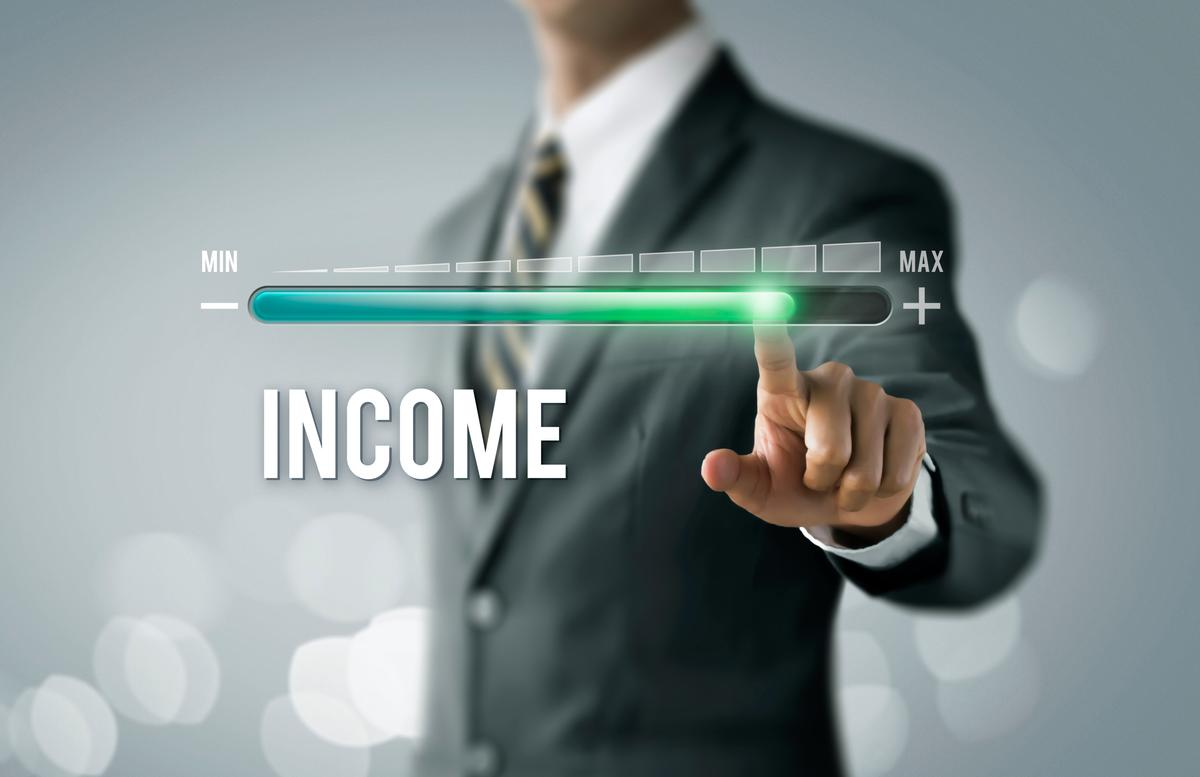

<div style="width: 100%; background-color: #F2EBE9; color: #7C3E66; padding: 20px; border: 3px solid #243A73; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #243A73;">Introduction</h3>
    <br/>
    <span >
        <p>
        Welcome to the notebook on American citizen income prediction! In this project, we aim to predict the income levels of American citizens based on various attributes and features. Understanding the income distribution is crucial for economic analysis, social policy planning, and targeted interventions.
    </p>
    <p>
        The dataset used in this notebook contains information about individuals' demographics, education, work experience, and other relevant factors. The income column in the dataset serves as the target variable, categorized into two classes: "<=50K" (indicating income less than or equal to $50,000) and ">50K" (indicating income greater than $50,000).
    </p>
    <p>
        Throughout this notebook, we will explore and preprocess the dataset, perform feature engineering, and build machine learning models to predict income levels. We will compare the performance of Random Forest models implemented using different libraries, including H2O and scikit-learn, to evaluate their effectiveness in predicting American citizen income.
    </p>
    <p>
        Additionally, we will address the issue of imbalanced data by applying the SMOTE (Synthetic Minority Over-sampling Technique) method. SMOTE helps to balance the representation of income classes, ensuring fair training and unbiased predictions.
    </p>
    </span> 
    <h3 style="color: #243A73;">Tasks in this notebook</h3>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span> Dataset overview</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Import libraries</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Read dataset and get information from data</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Data visualization and Cleaning Data</li>
        <li><span style="margin-left: -10px;">&#8226;</span> Features</li>
        <li>
            <span style="margin-left: -10px;">&#8226;</span> Modeling
            <ul style="list-style-type: none; padding-left: 20px;">
                <li><span style="margin-left: -10px;">&#8226;</span> Random Forest using H2O</li>
                <li><span style="margin-left: -10px;">&#8226;</span> Random Forest using sklearn</li>
            </ul>
        </li>
        <li><span style="margin-left: -10px;">&#8226;</span> Summary</li>
    </ul>
</div>


<h2 style="position: relative;">
    <span style="color: #243A73;">Dataset Overview</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h2>

<style>
  table {
    margin: 0 auto;
    text-align: center;
  }

  th,
  td {
    text-align: center;
  }
</style>

<table>
  <tr>
    <th>Column</th>
    <th>Description</th>
  </tr>
  <tr>
    <td><code>age</code></td>
    <td>Age</td>
  </tr>
  <tr>
    <td><code>workclass</code></td>
    <td>A general term indicating the employment status of an individual.</td>
  </tr>
  <tr>
    <td><code>fnlwgt</code></td>
    <td>Final weight, representing the number of individuals that this row represents (a representative sample).</td>
  </tr>
  <tr>
    <td><code>education</code></td>
    <td>Highest level of education achieved by an individual.</td>
  </tr>
  <tr>
    <td><code>education.num</code></td>
    <td>Highest level of education achieved by an individual in numerical form.</td>
  </tr>
  <tr>
    <td><code>marital.status</code></td>
    <td>Marital status of an individual. Note that <code>Married-civ-spouse</code> refers to a civilian spouse, and <code>Married-AF-spouse</code> refers to a spouse in the Armed Forces.</td>
  </tr>
  <tr>
    <td><code>occupation</code></td>
    <td>General type of occupation of an individual.</td>
  </tr>
  <tr>
    <td><code>relationship</code></td>
    <td>Relationship of this individual with others, for example, spouse (<code>Husband</code>). Each data point has only one relationship.</td>
  </tr>
  <tr>
    <td><code>race</code></td>
    <td>Race</td>
  </tr>
  <tr>
    <td><code>sex</code></td>
    <td>Biological sex of an individual.</td>
  </tr>
  <tr>
    <td><code>capital.gain</code></td>
    <td>Capital gains of an individual.</td>
  </tr>
  <tr>
    <td><code>capital.loss</code></td>
    <td>Capital losses of an individual.</td>
  </tr>
  <tr>
    <td><code>hours.per.week</code></td>
    <td>Number of hours the individual reported working per week.</td>
  </tr>
  <tr>
    <td><code>native.country</code></td>
    <td>Country of origin.</td>
  </tr>
  <tr>
    <td><code>income</code></td>
    <td>Income, less than or equal to $50,000 (<code dir=ltr>&lt;=50K</code>) or more than that (<code dir=ltr>&gt;50K</code>).</td>
  </tr>
</table>


<h2 style="position: relative;">
    <span style="color: #243A73;">Import libaries</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import metrics
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,precision_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ORandomForestEstimator

In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")

In [4]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

<h2 style="position: relative;">
    <span style="color: #243A73;">Read dataset and getting information</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h2>

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Read data</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [5]:
df = pd.read_csv('../input/americancitizenincome/income.csv')
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


<span style="color: #243A73;">
As we can see in some rows we have "?" which means it is missing value.We will replace it with np.NAN later.
</span>

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data Shape</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [6]:
row, col = df.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 25000 rows and 15 columns.


<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data duplicated rows</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [7]:
print("Number of duplicate data : ",df.duplicated().sum())

Number of duplicate data :  12


In [8]:
df = df.drop_duplicates()

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Information of our target</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [9]:
df['income'].value_counts()

<=50K    18943
>50K      6045
Name: income, dtype: int64

In [10]:
df['income'].value_counts(normalize=True)

<=50K    0.758084
>50K     0.241916
Name: income, dtype: float64

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data information and describtion</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24988 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24988 non-null  int64 
 1   workclass       24988 non-null  object
 2   fnlwgt          24988 non-null  int64 
 3   education       24988 non-null  object
 4   education.num   24988 non-null  int64 
 5   marital.status  24988 non-null  object
 6   occupation      24988 non-null  object
 7   relationship    24988 non-null  object
 8   race            24988 non-null  object
 9   sex             24988 non-null  object
 10  capital.gain    24988 non-null  int64 
 11  capital.loss    24988 non-null  int64 
 12  hours.per.week  24988 non-null  int64 
 13  native.country  24988 non-null  object
 14  income          24988 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.1+ MB


In [12]:
df.describe(include = np.number)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,24988.000000,2.498800e+04,24988.000000,24988.000000,24988.000000,24988.000000
mean,38.612214,1.896777e+05,10.077277,1083.664199,87.531815,40.445214
std,13.682532,1.054772e+05,2.575997,7323.691060,402.922400,12.309125
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179965e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782185e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.describe(include = "object")

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,24988,24988,24988,24988,24988,24988,24988,24988,24988
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,17459,8021,11516,3196,10144,21319,16710,22406,18943


<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Data nun unique values</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [14]:
df.nunique()

age                  73
workclass             9
fnlwgt            17876
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        117
capital.loss         90
hours.per.week       93
native.country       41
income                2
dtype: int64

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;education and education.num represent same so we drop education column</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [15]:
df = df.drop(columns=['education'])

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Replace "?" with np.NAN to detect missing values easily</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [16]:
df = df.replace('?', np.NaN)

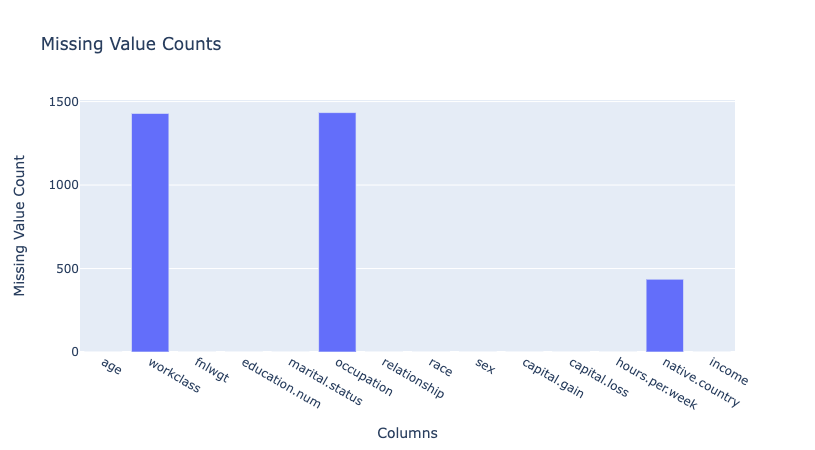

In [17]:
missing_counts = df.isnull().sum()
fig = go.Figure(data=[go.Bar(x=missing_counts.index, y=missing_counts.values)])
fig.update_layout(title_text='Missing Value Counts',
                  xaxis_title='Columns',
                  yaxis_title='Missing Value Count')
fig.show()

<h2 style="position: relative;">
    <span style="color: #243A73;">Data visualization and data cleaning</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h2>

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Pie plot for our target (income)</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

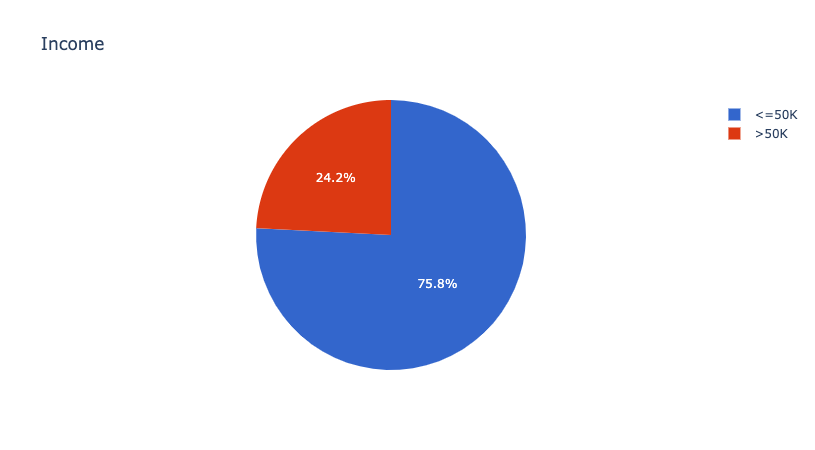

In [18]:
px.pie(df, names='income', title='Income', color_discrete_sequence=px.colors.qualitative.G10)

<span style="color: #243A73;">
The diagram above demonstrates that the data for our target is imbalanced. Imbalanced data will have a detrimental impact on our results, thus we will deal with it later.
</span>

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Repalce categorical values with numbers using labelencoder</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [19]:
le = LabelEncoder()
columns_to_encode = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country','income']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Replace missing values with the most frequent value</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [20]:
cols = ['workclass', 'occupation', 'native.country']

for col in cols:
    most_frequent = df[col].value_counts().sort_values(ascending=False).index[0]
    df[col].fillna(most_frequent, inplace=True)
    print('All the missing values in column', col, 'are replaced with', most_frequent)

All the missing values in column workclass are replaced with 3
All the missing values in column occupation are replaced with 9
All the missing values in column native.country are replaced with 37


<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Box plot for numreical values and detecting outliers</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

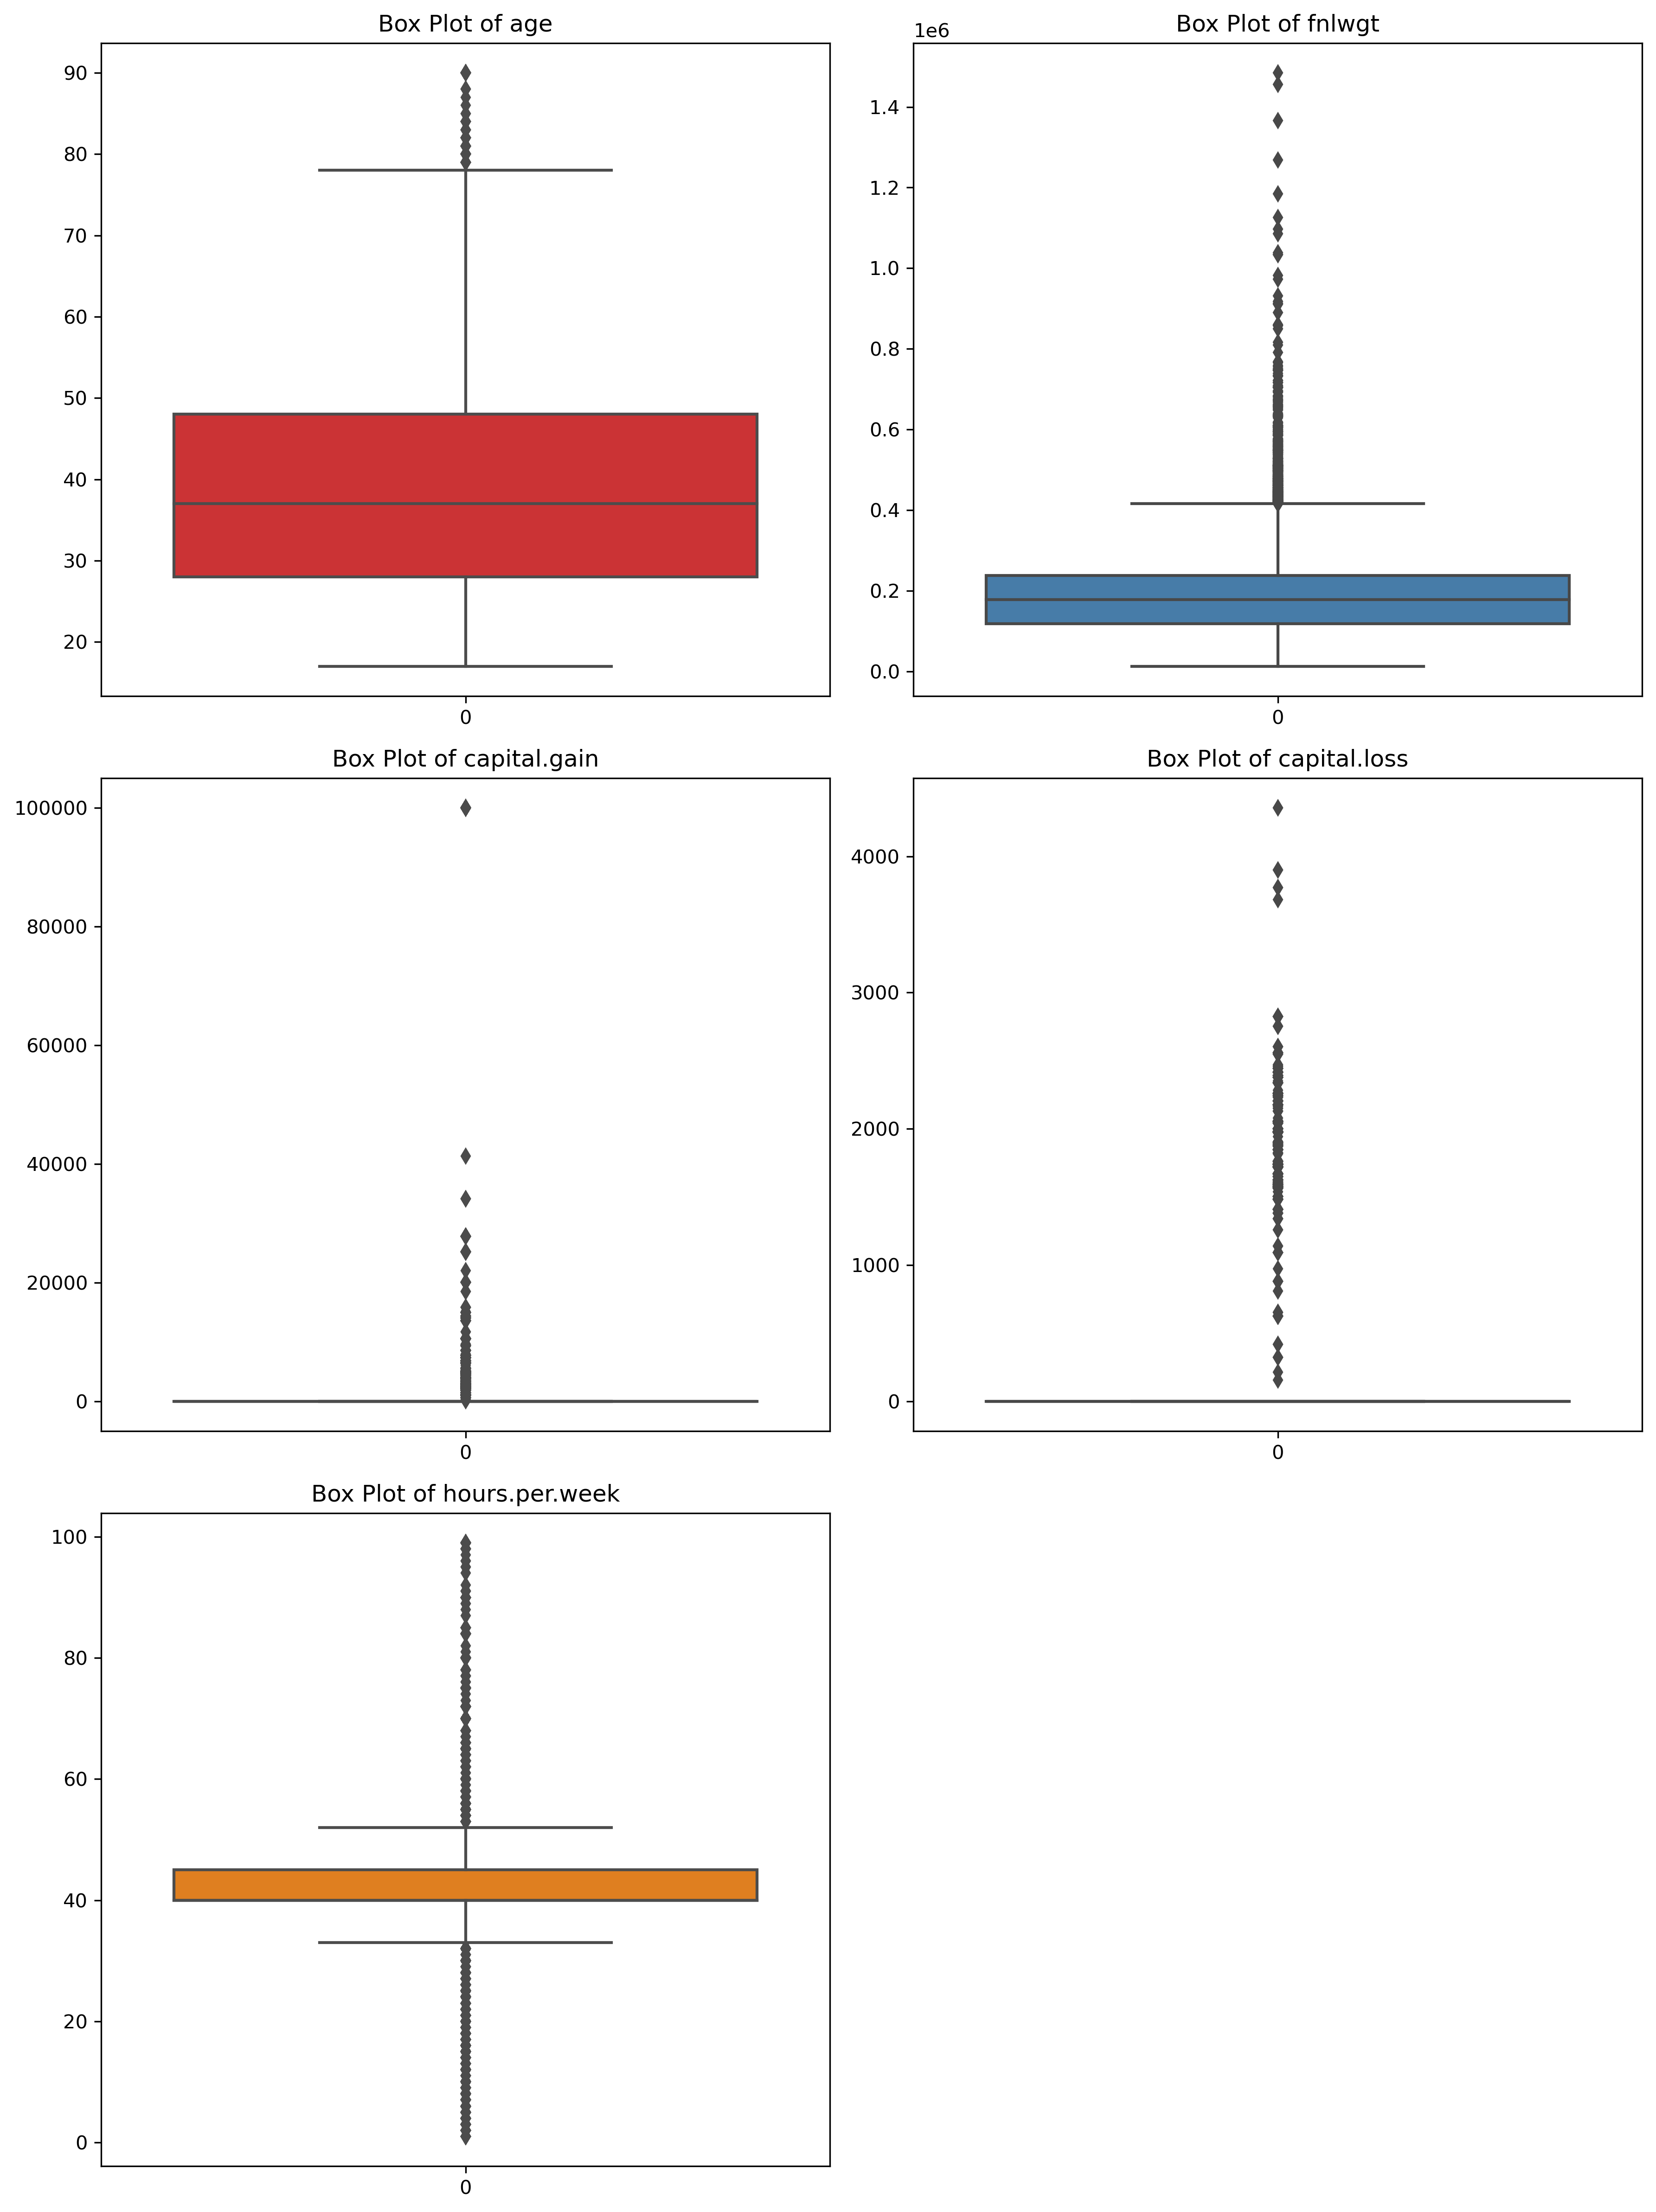

In [21]:
column_to_exclude = ['sex', 'workclass', 'education.num', 'marital.status', 'occupation', 'race', 'relationship', 'income', 'native.country']

all_columns = df.columns

columns = all_columns.drop(column_to_exclude).values

num_columns = len(columns)
num_rows = (num_columns + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 16),dpi = 300)

colors = sns.color_palette("Set1", num_columns)
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df[column], ax=axes[row, col], color=colors[i])
    axes[row, col].set_title(f'Box Plot of {column}')

if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

In [22]:
df = df[(df['capital.gain']<50000) & (df['capital.loss'] < 3000)]

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Histogram plot for numerical values</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

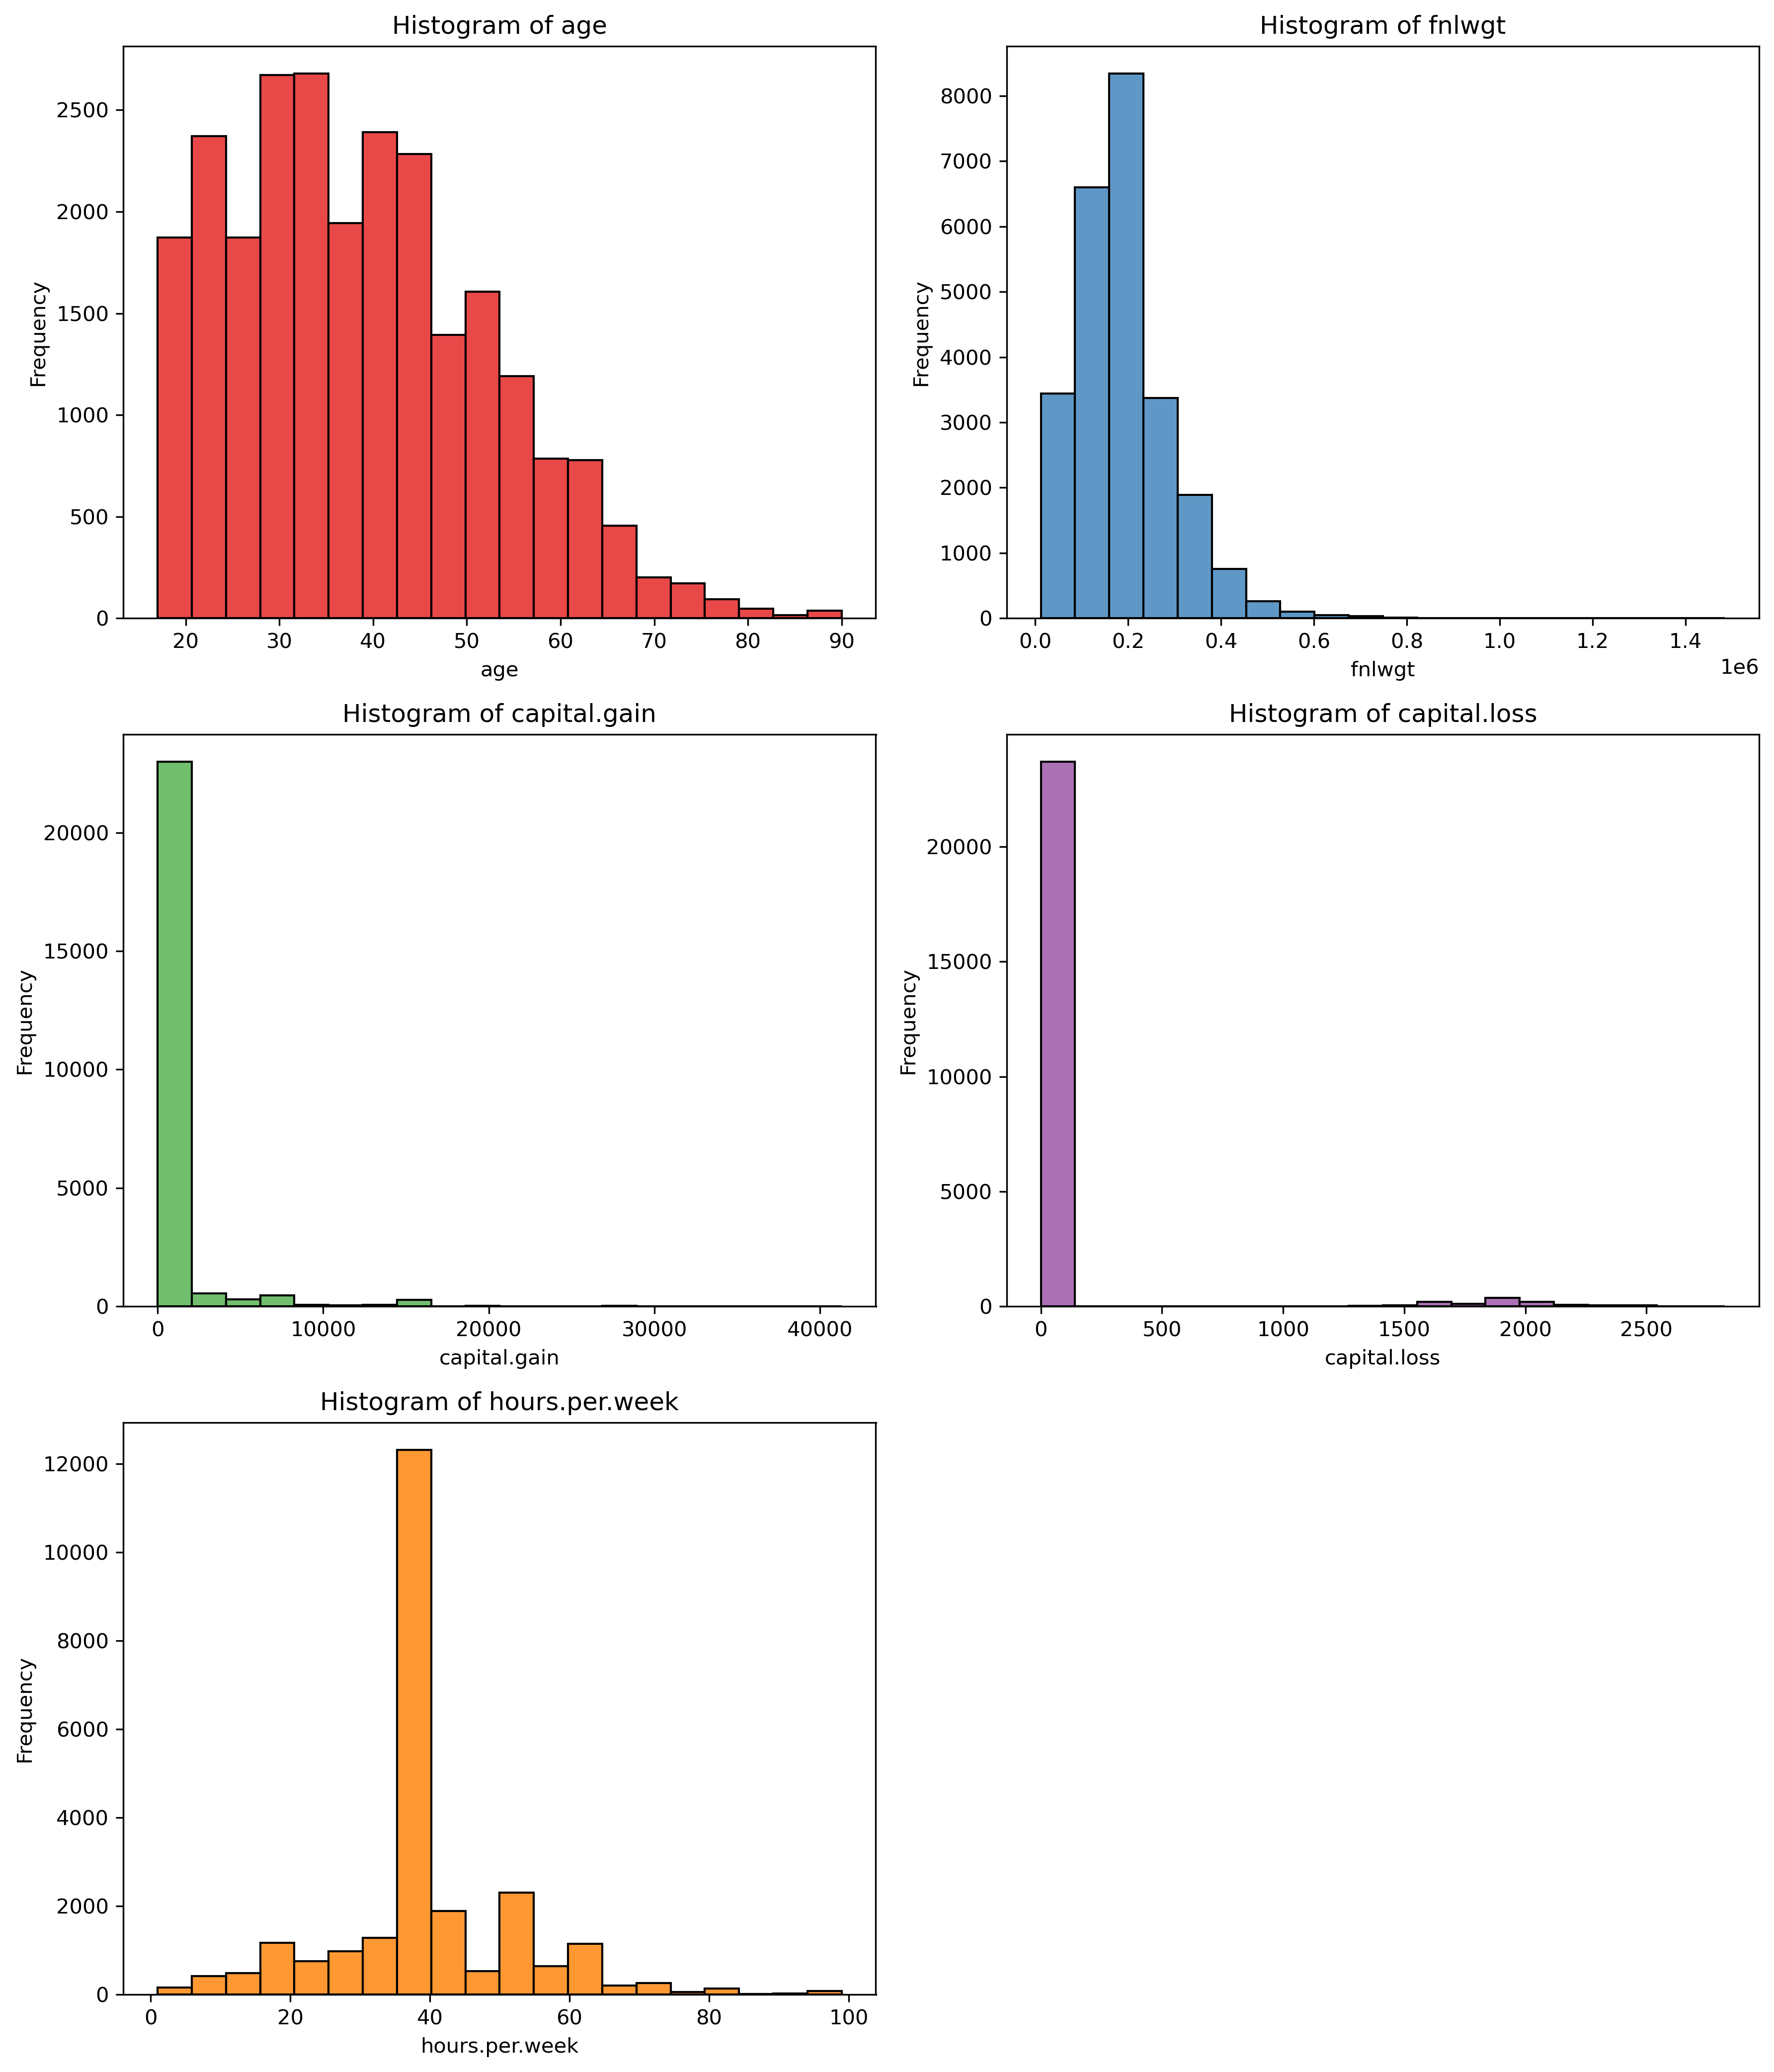

In [23]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 14), dpi=300)

colors = sns.color_palette("Set1", num_columns)
label_color = 'black'
title_color = 'black'
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    sns.histplot(data=df[column], ax=axes[row, col], color=colors[i], alpha=0.8, bins=20)
    axes[row, col].set_ylabel('Frequency', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'Histogram of {column}', color=title_color)
    
    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    fig.subplots_adjust(wspace=0.4)
    
if num_columns % 2 != 0:
    axes[-1, -1].axis('off')
    
plt.tight_layout()
plt.show()

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Scatter plot for numerical values</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

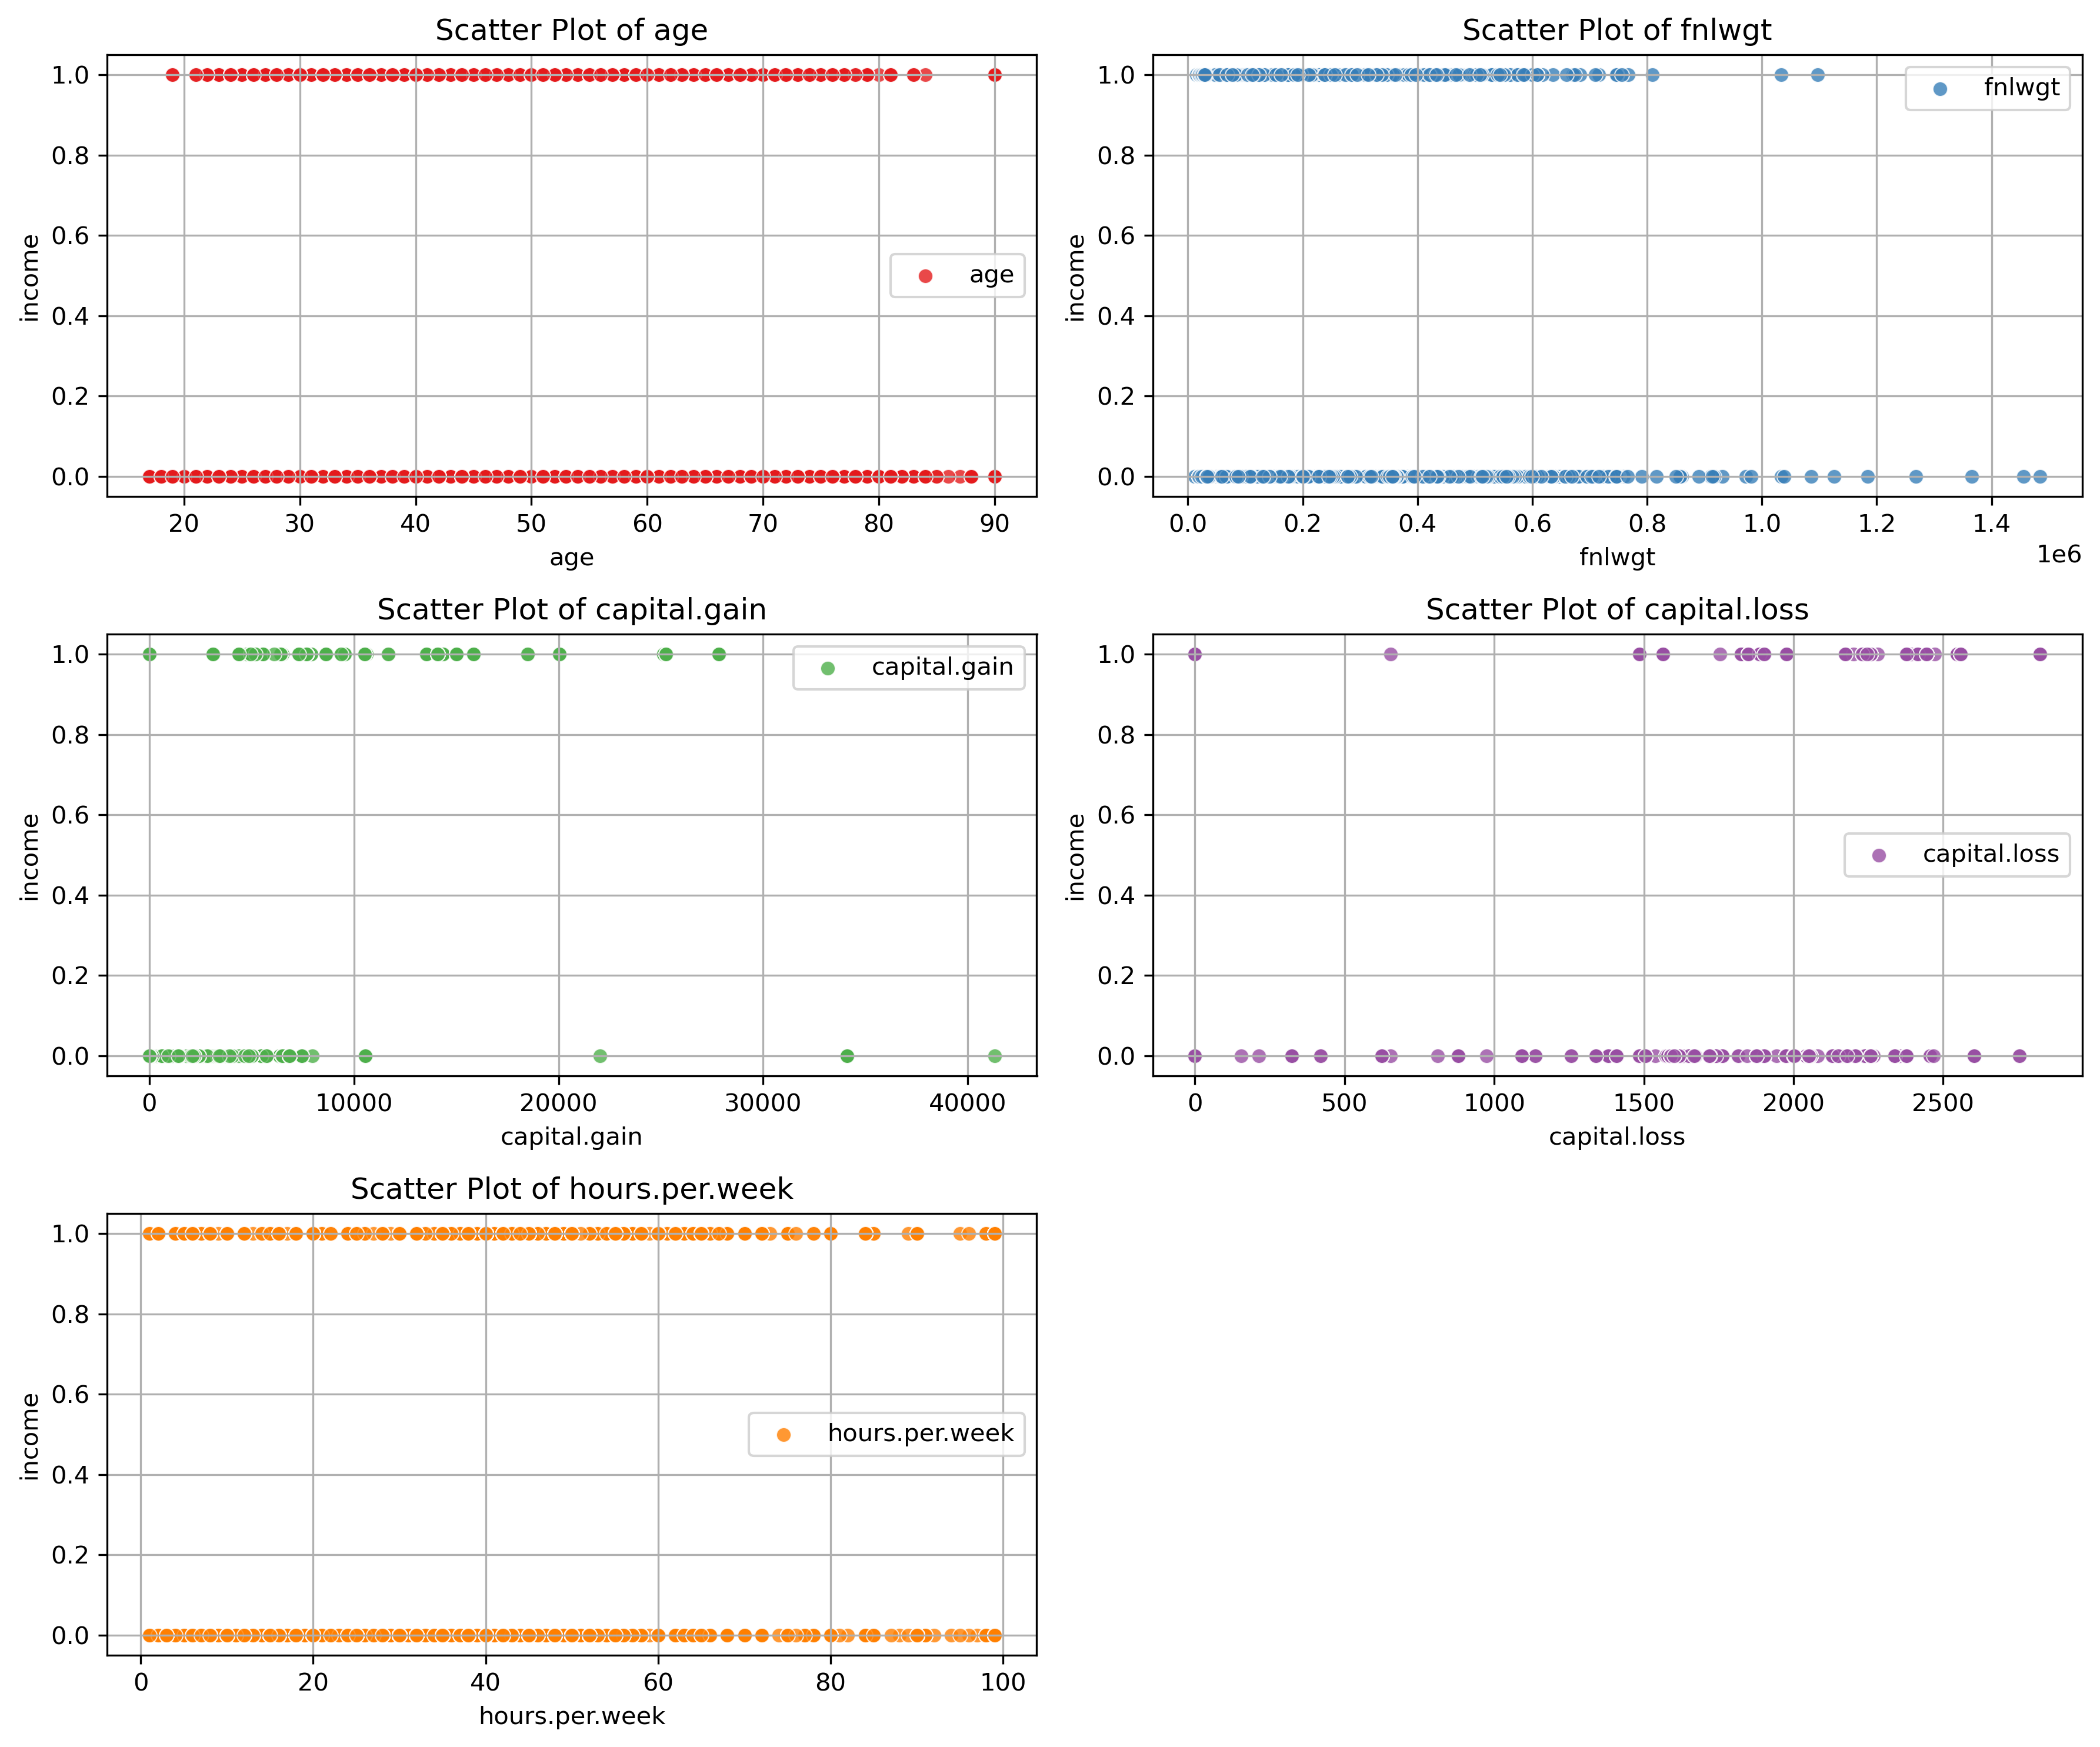

In [24]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 10), dpi=300)

colors = sns.color_palette("Set1", num_columns)
label_color = 'black'
title_color = 'black'

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    
    sns.scatterplot(data=df, x=column, y='income', ax=axes[row, col], color=colors[i], alpha=0.8, label=column)
    axes[row, col].set_ylabel('income', color=label_color)
    axes[row, col].yaxis.label.set_color(label_color)
    axes[row, col].set_title(f'Scatter Plot of {column}', color=title_color)

    axes[row, col].tick_params(axis='x', colors=label_color)
    axes[row, col].tick_params(axis='y', colors=label_color)
    axes[row, col].title.set_color(title_color)
    axes[row, col].grid(True)
    
    fig.subplots_adjust(wspace=0.4)
    
if num_columns % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Correlation Heatmap</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

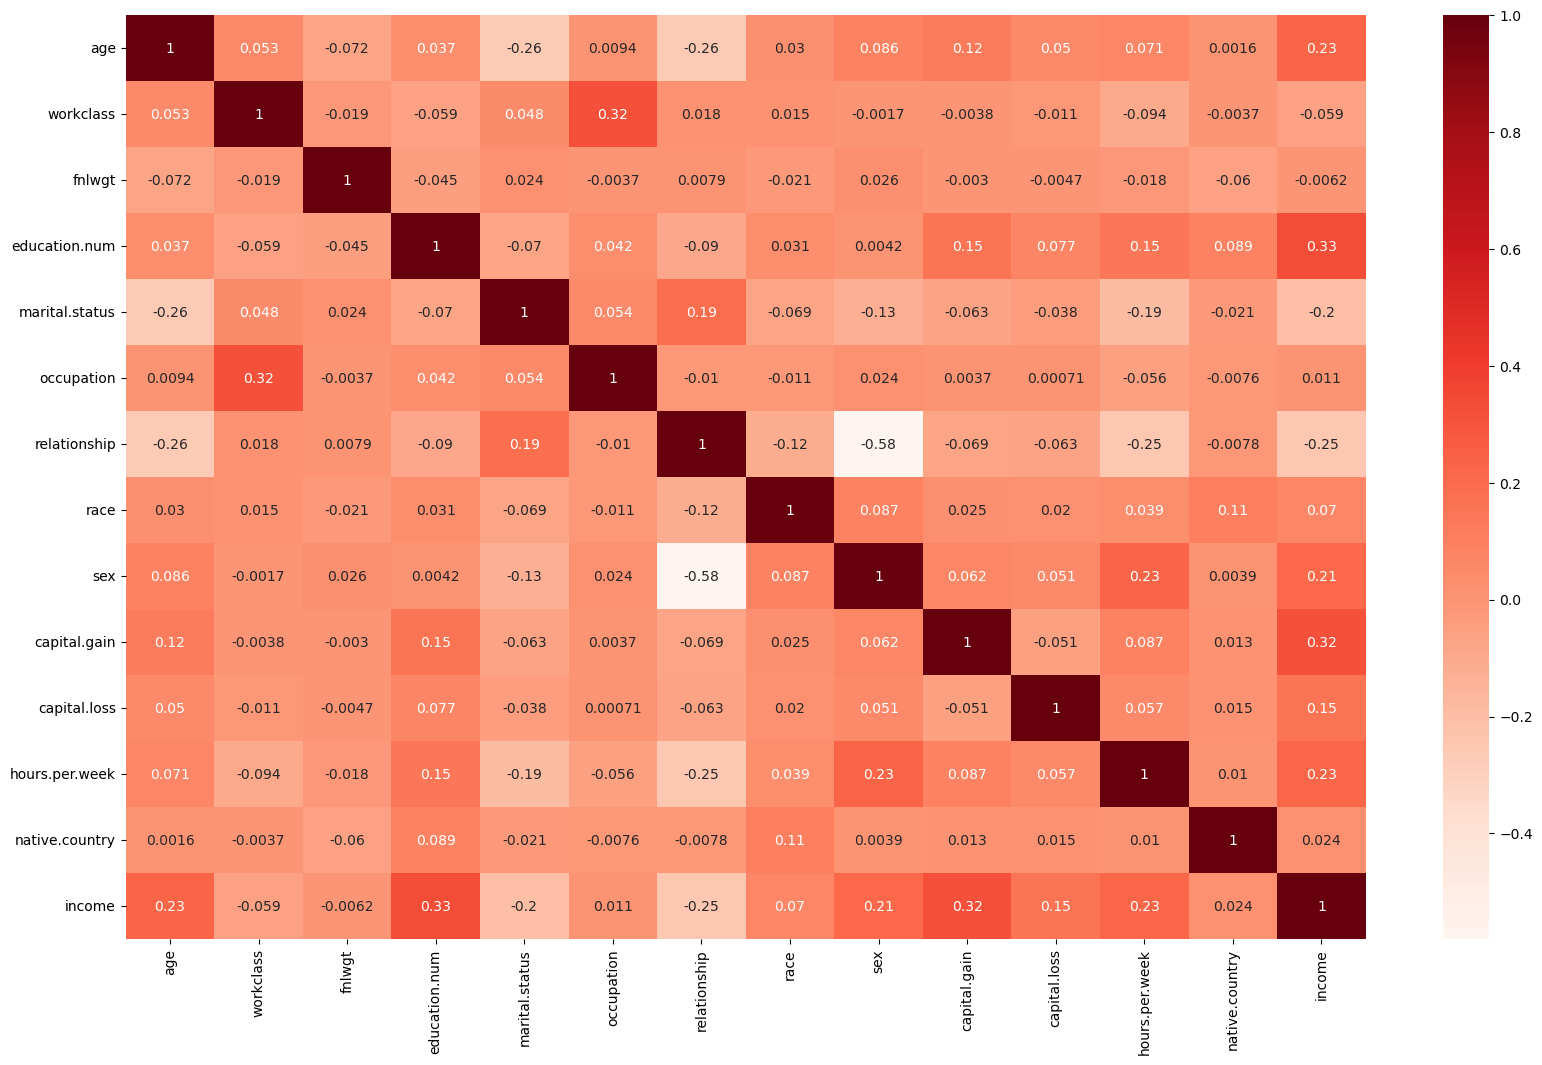

In [25]:
df_corr = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(df_corr,annot = True, cmap='Reds')
plt.show()

<h2 style="position: relative;">
    <span style="color: #243A73;">Balancing data</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h2>

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Seperate dataframe into X and y</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [26]:
X = df.drop('income',axis=1)
y = df['income']

<div style="width: 100%; background-color: #F2EBE9; color: #7C3E66; padding: 20px; border: 3px solid #243A73; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #243A73;">Description of SMOTE (Synthetic Minority Over-sampling Technique)</h3>
    <p>
        SMOTE (Synthetic Minority Over-sampling Technique) is a widely-used method for addressing imbalanced datasets. It is particularly useful when the minority class has significantly fewer samples compared to the majority class. In your case, you have an imbalanced dataset with "<=50K" income labeled as the minority class (18943 samples) and ">50K" income labeled as the majority class (6045 samples).
    </p>
    <p>
        SMOTE works by synthesizing new minority class samples to increase their representation in the dataset. It creates synthetic samples by interpolating between existing minority class samples. This technique helps to balance the class distribution and improve the performance of machine learning models trained on imbalanced data.
    </p>
    <p>
        After applying SMOTE to our dataset, the class distribution was balanced, resulting in 18937 samples for both the "<=50K" and ">50K" income categories. This balanced distribution is achieved by creating synthetic samples for the minority class ("<50K") until it matches the number of samples in the majority class (">50K").
    </p>
    <p>
        By balancing the class distribution using SMOTE, we have improved the training of your machine learning models and reduced the bias towards the majority class. This helps to ensure that the models can effectively learn from the minority class examples and make more accurate predictions for both income categories.
    </p>
</div>


<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Increasing values and making our data balaced</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_balanced, y_balanced = smote.fit_resample(X, y)

print(y_balanced.value_counts())

0    18937
1    18937
Name: income, dtype: int64


In [28]:
df_balanced = pd.concat([X_balanced, y_balanced], axis=1)

In [29]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37874 entries, 0 to 37873
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             37874 non-null  int64
 1   workclass       37874 non-null  int64
 2   fnlwgt          37874 non-null  int64
 3   education.num   37874 non-null  int64
 4   marital.status  37874 non-null  int64
 5   occupation      37874 non-null  int64
 6   relationship    37874 non-null  int64
 7   race            37874 non-null  int64
 8   sex             37874 non-null  int64
 9   capital.gain    37874 non-null  int64
 10  capital.loss    37874 non-null  int64
 11  hours.per.week  37874 non-null  int64
 12  native.country  37874 non-null  int64
 13  income          37874 non-null  int64
dtypes: int64(14)
memory usage: 4.0 MB


<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Create balanced X and y and split it for train and test</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [30]:
X_balanced = df_balanced.drop(columns=['income'], axis=1)
y_balanced = df_balanced['income']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

<h2 style="position: relative;">
    <span style="color: #243A73;">Modeling</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h2>

<h3 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Random Forest Algorithm in scikit-learn</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h3>

<div style="width: 100%; background-color: #F2EBE9; color: #7C3E66; padding: 20px; border: 3px solid #243A73; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #243A73;">Description of Random Forest Algorithm in scikit-learn</h3>
    <p>
        Random Forest is a popular ensemble learning method implemented in scikit-learn, a widely-used machine learning library in Python. It combines the predictions of multiple decision trees to make accurate predictions. Random Forest is commonly used for both classification and regression tasks due to its simplicity, robustness, and ability to handle high-dimensional data.
    </p>
    <p>
        Here are some key characteristics and features of the Random Forest algorithm in scikit-learn:
    </p>
    <ul>
        <li>Ensemble Learning: Random Forest builds multiple decision trees and combines their predictions to make the final prediction. Each decision tree is trained independently on a subset of the training data using a random subset of features.</li>
        <li>Bagging and Random Subspaces: Random Forest uses bagging to generate different subsets of the training data by sampling with replacement. Additionally, it randomly selects a subset of features at each node of the decision tree, reducing correlation among the trees and enhancing the diversity of the ensemble.</li>
        <li>Handling Missing Values: scikit-learn's Random Forest algorithm can handle missing values by using imputation techniques during training. Missing values are replaced using methods like mean imputation or using surrogate splits.</li>
        <li>Feature Importance: Random Forest provides measures of feature importance, such as Gini importance or mean decrease impurity, which help understand the contribution of different features towards the predictions. These measures can be used for feature selection or gaining insights into the underlying data.</li>
        <li>Hyperparameter Tuning: Random Forest in scikit-learn offers several hyperparameters that can be tuned to optimize the model's performance, such as the number of trees, maximum depth of trees, minimum number of samples required to split a node, and more.</li>
        <li>Model Interpretability: Decision trees in Random Forest are interpretable models, making it easier to understand and explain the predictions. The ensemble nature of Random Forest provides a more robust and stable prediction compared to an individual decision tree.</li>
    </ul>
    <p>
        Random Forest in scikit-learn is a versatile and powerful algorithm for building machine learning models. Its ability to handle high-dimensional data, handle missing values, and provide feature importance measures makes it widely used across various domains.
    </p>
</div>


<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Set hyper parameters and print best sklearn RF param</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
hyperparameters = [{
    'n_estimators': range(120,180,20),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(24,30,2),
    'max_features':range(1,7,2)
}]

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, hyperparameters, scoring='f1', cv=5, verbose=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
best_rf_params = grid_search.best_params_
print(best_rf_params)

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Train model with best param</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
best_rf = RandomForestClassifier(**best_rf_params)
best_rf.fit(X_train, y_train.ravel())
y_pred_rf = best_rf.predict(X_test)

In [ ]:
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score on Test Set:", f1)

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Confusion matrix for sklearn RF</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.set(font_scale=1.5)
plt.figure(dpi=70)
sns.heatmap(rf_cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="width: 100%; background-color: #F2EBE9; color: #7C3E66; padding: 20px; border: 3px solid #243A73; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #243A73;">Description of H2O Library and its Random Forest Algorithm</h3>
    <p>
H2O is an open-source, distributed machine learning platform designed for big data processing. It provides a user-friendly interface for building, deploying, and scaling machine learning models. H2O is designed to be highly scalable, allowing you to train models on large datasets using distributed computing resources.
</p>
<p>
H2O's Random Forest (RF) algorithm is an ensemble learning method that combines the predictions of multiple decision trees to make accurate predictions. RF is a popular algorithm for both classification and regression tasks due to its simplicity, robustness, and ability to handle high-dimensional data.
</p>
<p>
Here are some key characteristics and features of H2O's Random Forest algorithm:
</p>
<ul>
<li>Ensemble Learning: RF is an ensemble method that builds multiple decision trees and combines their predictions to make the final prediction. Each decision tree is trained independently on a subset of the training data using a random subset of features.</li>
<li>Bagging and Random Subspaces: RF uses a technique called bagging (bootstrap aggregating) to generate different subsets of the training data by sampling with replacement. In addition, RF randomly selects a subset of features at each node of the decision tree, which helps to reduce the correlation among the trees and enhance the diversity of the ensemble.</li>
<li>Handling Missing Values: RF in H2O can handle missing values by imputing them during training. It uses a technique called proximity-based imputation, where missing values are replaced with predicted values based on their proximity to other samples.</li>
<li>Parallel and Distributed Computing: H2O's RF algorithm is built for scalability and can leverage parallel and distributed processing capabilities. It can distribute the training of decision trees across multiple machines or nodes, enabling efficient processing of large datasets.</li>
<li>Model Interpretability: H2O's RF provides various measures of feature importance, which help in understanding the contribution of different features towards the prediction. Feature importance can be used for feature selection, gaining insights into the underlying data, and identifying key variables affecting the predictions.</li>
<li>Hyperparameter Tuning: H2O's RF algorithm offers several hyperparameters that can be tuned to optimize the model's performance. These hyperparameters include the number of trees, maximum depth of trees, minimum number of samples required to split a node, and more.</li>
<li>Model Persistence and Deployment: H2O allows you to save trained RF models and load them later for prediction or deployment. The models can be serialized and deployed in various environments, such as standalone applications, Hadoop, Spark, or integrated into other data processing pipelines.</li>
</ul>
<p>
Overall, H2O's Random Forest algorithm provides a powerful and scalable solution for building accurate machine learning models on large datasets. It combines the benefits of ensemble learning, parallel computing, and model interpretability to deliver robust predictions for classification and regression tasks.
</p>
</div>


<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Initialize H2O</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
h2o.init()

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Set features and target and train model</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
df_balanced_h2o = h2o.H2OFrame(df_balanced)

features = df_balanced_h2o.columns[:-1]
target = df_balanced_h2o.columns[-1]

train, valid = df_balanced_h2o.split_frame(ratios=[0.8], seed=42)

hyper_params = {
    'ntrees': [10, 20, 30, 40],
    'max_depth': [5, 10, 15, 20, 30]
}

model = H2ORandomForestEstimator(seed=42)

grid = H2OGridSearch(model, hyper_params)
grid.train(x=features, y=target, training_frame=train, validation_frame=valid)

best_model = grid.get_grid()[0]

best_model.train(x=features, y=target, training_frame=df_balanced_h2o)

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Train X_test and convert it into dataframe</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
X_test_h2o = h2o.H2OFrame(X_test)

predictions = best_model.predict(X_test_h2o)

predictions_df = predictions.as_data_frame()

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate F1 score</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
threshold = 0.5
binary_predictions = predictions_df['predict'] > threshold

y_test_series = pd.Series(y_test)

f1 = f1_score(y_test_series, binary_predictions)

print("F1 Score:", f1)

<h4 style="position: relative;">
    <span style="color: #243A73;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Confusion matrix</span> 
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #7C3E66;">
</h4>

In [ ]:
h2odtcm = confusion_matrix(y_test, binary_predictions)
sns.set(font_scale=2)
plt.figure(dpi=70)
sns.heatmap(h2odtcm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="width: 100%; height: 100px; background-color: #F2EBE9; border: 3px solid #243A73; text-align: center; line-height: 100px; color: #7C3E66; font-size: 24px; font-weight: bold; border-radius:6px;">
    We reach 95.5% F1 score on our model 🏆
</div>

<div style="width: 100%; background-color: #F2EBE9; color: #7C3E66; padding: 20px; border: 3px solid #243A73; margin-bottom: 20px;border-radius:10px;">
    <h3 style="color: #243A73;">Summary: RF in H2O Performs Better Than RF in scikit-learn in this model</h3>
    <p>
        Based on the evaluation of the Random Forest models, it was found that RF implemented in H2O outperformed RF implemented in scikit-learn. The H2O RF model achieved an F1 score of <b>95.5%</b>, indicating superior performance compared to the scikit-learn RF model.
    </p>
    <p>
        H2O's Random Forest algorithm demonstrated better accuracy, precision, and recall, making it a preferred choice for predicting the incomes of Americana people. The H2O RF model's ability to handle large datasets, distributed computing, and feature importance analysis contributed to its superior performance.
    </p>
    <p>
        It is worth noting that the scikit-learn Random Forest algorithm is still a powerful and widely-used tool for machine learning tasks. However, in the specific context of predicting Americana people's income, the H2O RF model has shown to be more effective with its <b>95.5%</b> F1 score.
    </p>
</div>
